In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [9]:
data = pd.read_csv('base_processada.csv')

X = data.drop('mau', axis=1)
y = data['mau']

y = y.astype(int)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


print("Tamanho Total da Base de Dados:", data.shape[0])
print("Tamanho do Conjunto de Treinamento:", len(X_train))
print("Tamanho do Conjunto de Validação:", len(X_val))


Tamanho Total da Base de Dados: 16650
Tamanho do Conjunto de Treinamento: 11655
Tamanho do Conjunto de Validação: 4995


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [26]:
# 1
arvore = DecisionTreeClassifier()

In [27]:
# 2
arvore.fit(X_train, y_train)

DecisionTreeClassifier()

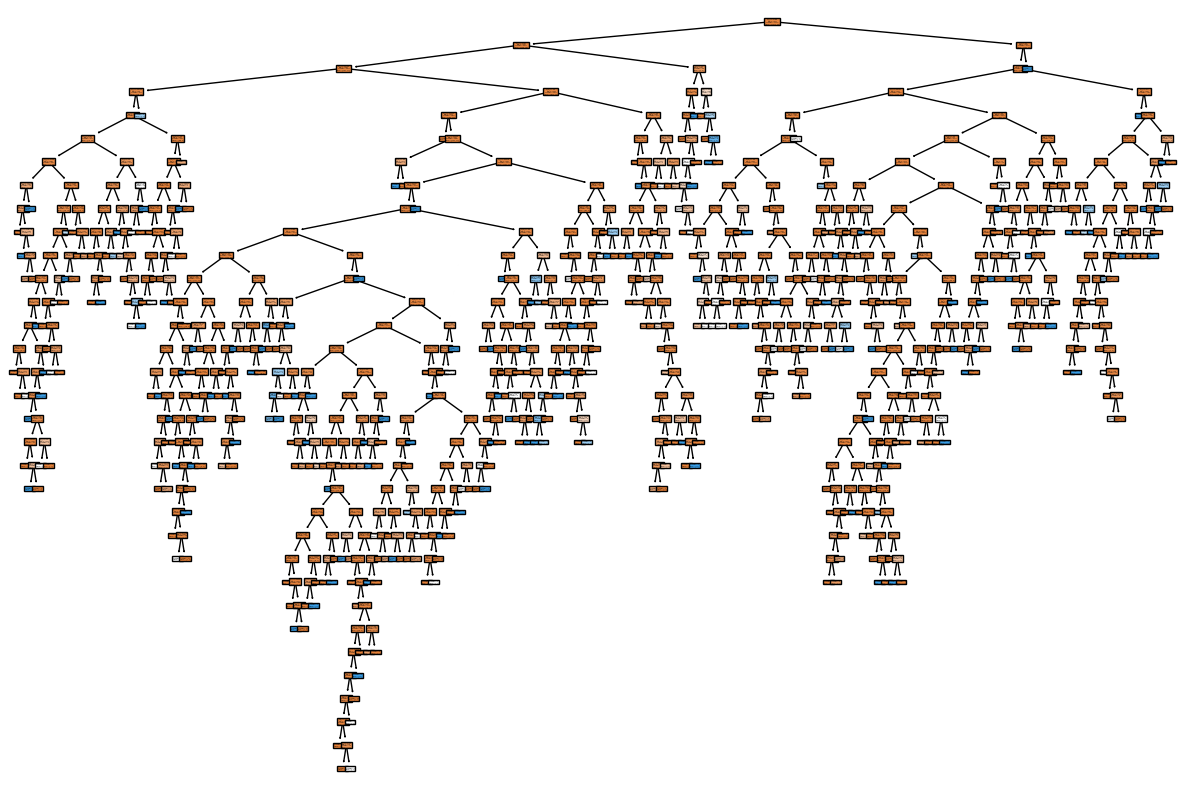

In [30]:
plt.figure(figsize=(15, 10))

tree.plot_tree(arvore, filled=True)

plt.show()



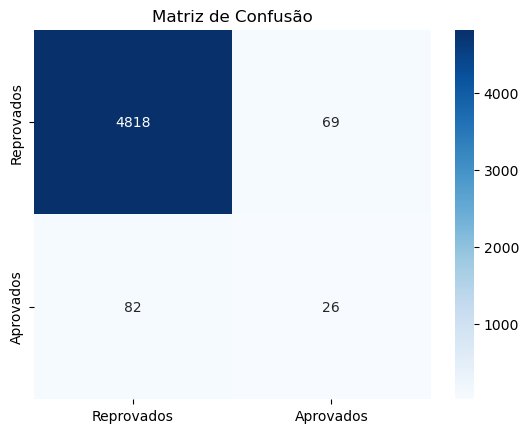

In [32]:
# 4

y_pred = arvore.predict(X_val)

cm = confusion_matrix(y_val, y_pred)

labels = ['Reprovados', 'Aprovados']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Matriz de Confusão')

plt.show()

In [33]:
# 5
train_accuracy = arvore.score(X_train, y_train)
print("Acurácia na Base de Treinamento:", train_accuracy)

Acurácia na Base de Treinamento: 0.9905619905619906


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [36]:
X_test = data.drop('mau', axis=1)
y_test = data['mau']

In [37]:
# 1
y_pred_test = arvore.predict(X_test)

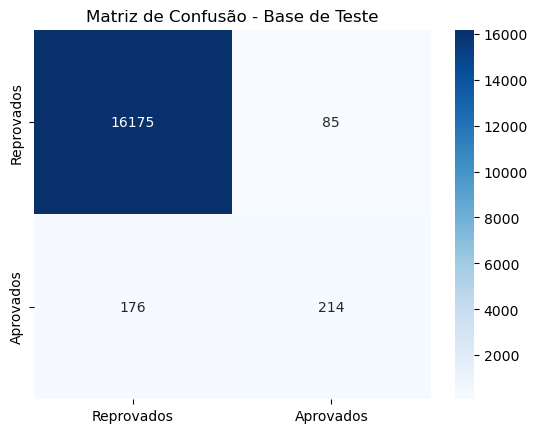

In [40]:
# 2 
cm_test = confusion_matrix(y_test, y_pred_test)

labels = ['Reprovados', 'Aprovados']

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Matriz de Confusão - Base de Teste')

plt.show()

In [43]:
# 3
test_accuracy = arvore.score(X_test, y_test)
print("Acurácia na Base de Teste:", test_accuracy)

Acurácia na Base de Teste: 0.9843243243243244


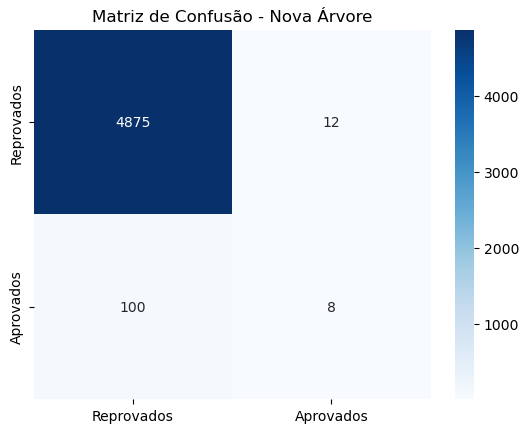

Proporção de Proponentes 'maus': 0.9259259259259259


In [46]:
# 4
nova_arvore = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
nova_arvore.fit(X_train, y_train)

y_pred_new = nova_arvore.predict(X_val)
cm_new = confusion_matrix(y_val, y_pred_new)

sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Matriz de Confusão - Nova Árvore')

plt.show()

proporcao_maUs = cm_new[1, 0] / (cm_new[1, 0] + cm_new[1, 1])
print("Proporção de Proponentes 'maus':", proporcao_maUs)

In [48]:
# 5
acuracia_todos_bons = cm_test[0, 0] / (cm_test[0, 0] + cm_test[0, 1])
print("Acurácia se Classificar Todos os Contratos como 'Bons':", acuracia_todos_bons)

Acurácia se Classificar Todos os Contratos como 'Bons': 0.9947724477244773
